In [3]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from IPython.display import Image

ModuleNotFoundError: No module named 'fastai'

In [29]:
path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [30]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [32]:
btn_upload.observe(on_data_change, names=['data'])

# Which kingfisher did you see?


Any of the following kingfisher species can be identified:

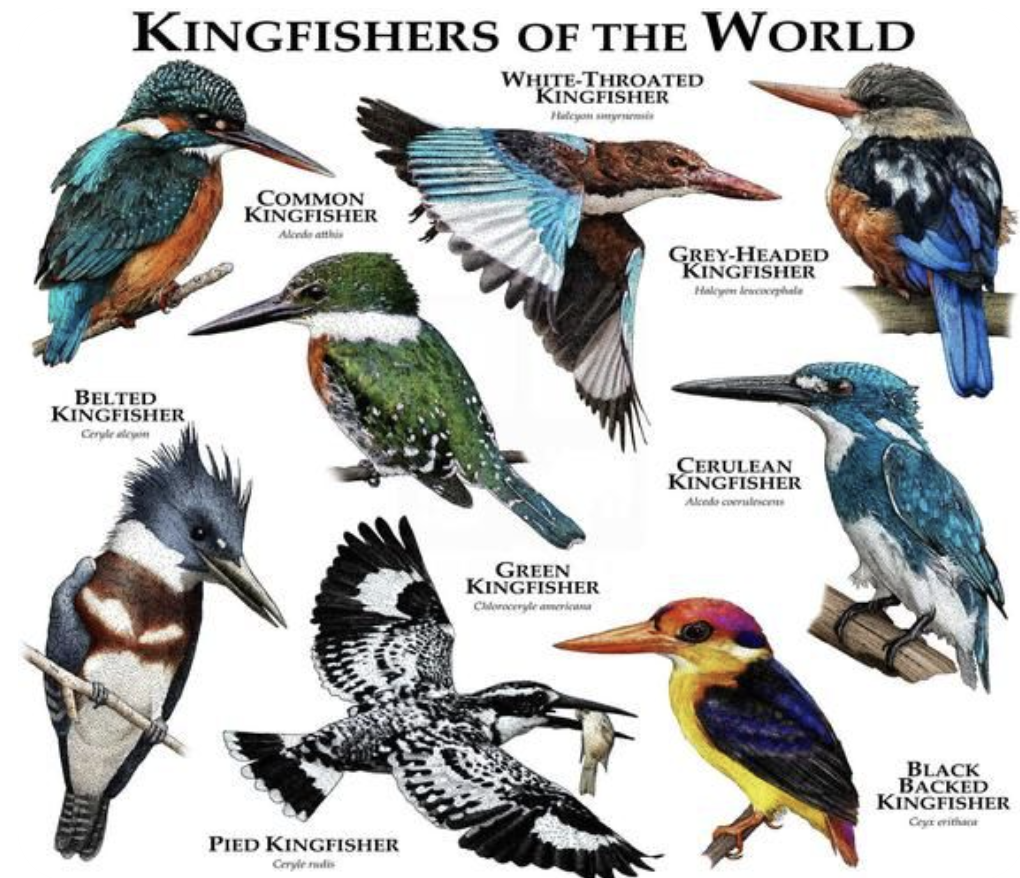

In [9]:
Image(filename='kingfisher_poster.png', width=300)

In [33]:
display(VBox([widgets.Label('Upload your kingfisher photo'), btn_upload, out_pl, lbl_pred]))